In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

In [3]:
# Read and arrange city home value data from Zillow (https://www.zillow.com/research/data/)
# Calculate average of the median by month in year 2016

city_homes_data = pd.read_csv("City_Homes.csv")
city_homes_data["Average Median Home Value"] = (city_homes_data["2016-01"]+city_homes_data["2016-02"]+city_homes_data["2016-03"]+city_homes_data["2016-04"]+
                              city_homes_data["2016-05"]+city_homes_data["2016-06"]+city_homes_data["2016-07"]+city_homes_data["2016-08"]+
                              city_homes_data["2016-09"]+city_homes_data["2016-10"]+city_homes_data["2016-11"]+city_homes_data["2016-12"])/12
city_homes_data = city_homes_data[["City", "State", "Average Median Home Value"]]
city_homes_data.head()

,City,State,Average Median Home Value
0,New York,NY,577450.000000
1,Los Angeles,CA,580283.333333
2,Chicago,IL,211350.000000
3,Houston,TX,153700.000000
4,Philadelphia,PA,118308.333333


In [4]:
# Read and arrange city offenses data from FBI (https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/topic-pages/offenses-known-to-law-enforcement)

city_offenses_data = pd.read_excel("City_Offenses.xls")
city_offenses_data = city_offenses_data[["City", "Population", "Violent crime", "Violent crime rate"]]
city_offenses_data.head()

,City,Population,Violent crime,Violent crime rate
0,Abbeville,23052.0,162.0,702.758980
1,Aberdeen,69821.0,313.0,448.289197
2,Aberdeen Township,18562.0,18.0,96.972309
3,Abernathy,2728.0,3.0,109.970674
4,Abilene,129024.0,554.0,429.377480


In [5]:
# Merge offenses data with home value data

merged_offenses_homes = pd.merge(city_homes_data, city_offenses_data, on="City", how="inner")
merged_offenses_homes.head()

,City,State,Average Median Home Value,Population,Violent crime,Violent crime rate
0,New York,NY,577450.000000,8566917.0,49124.0,573.415150
1,Los Angeles,CA,580283.333333,4007905.0,28817.0,719.004068
2,Chicago,IL,211350.000000,2725153.0,30126.0,1105.479215
3,Houston,TX,153700.000000,2338653.0,23963.0,1024.649659
4,Houston,MS,70866.666667,2338653.0,23963.0,1024.649659


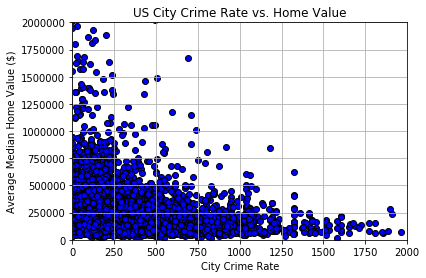

In [7]:
# Create scatter plot of home value against crime rate

plt.scatter(merged_offenses_homes["Violent crime rate"], merged_offenses_homes["Average Median Home Value"], marker="o", facecolor="blue", edgecolor="black")
plt.title("US City Crime Rate vs. Home Value")
plt.ylabel("Average Median Home Value ($)")
plt.xlabel("City Crime Rate")
plt.xlim(0,2000)
plt.ylim(0,2000000)
plt.grid(True)

# Save Figure

plt.savefig("US_City_Crime_Rate_vs_Home_Value.png", bbox_inches="tight")

In [10]:
# Calculate p-value using pearsonr

(coefficient, p) = pearsonr(merged_offenses_homes["Violent crime rate"], merged_offenses_homes["Average Median Home Value"])
print("p-value is {}.".format(p))

p-value is 1.8312317621847128e-10.


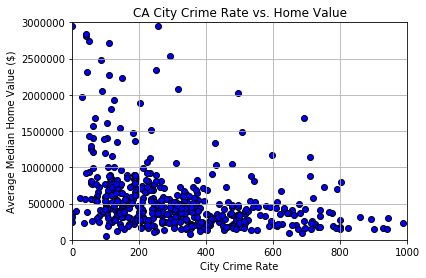

In [11]:
# Create same scatter plot for California cities only

ca_offenses_merged = merged_offenses_homes.loc[merged_offenses_homes["State"] == "CA"]

plt.scatter(ca_offenses_merged["Violent crime rate"], ca_offenses_merged["Average Median Home Value"], marker="o", facecolor="blue", edgecolor="black")
plt.title("CA City Crime Rate vs. Home Value")
plt.ylabel("Average Median Home Value ($)")
plt.xlabel("City Crime Rate")
plt.xlim(0,1000)
plt.ylim(0,3000000)
plt.grid(True)

In [17]:
# Calculate p-value using pearsonr

(coefficient, p) = pearsonr(ca_offenses_merged["Violent crime rate"], ca_offenses_merged["Average Median Home Value"])
print("p-value is {}.".format(p))

p-value is 2.9005656836394537e-13.


In [12]:
# Read and arrange law enforcement data from FBI (https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/topic-pages/police-employees)
# Calculate number of law enforcement employees per 10,000 population

city_law_enforcement_data = pd.read_excel("City_Law_Enforcement.xls")
city_law_enforcement_data["Law enforcement per 10K population"] = city_law_enforcement_data["Total law\nenforcement\nemployees"]/city_law_enforcement_data["Population"]*10000
city_law_enforcement_data = city_law_enforcement_data[["City", "Population", "Total law\nenforcement\nemployees", "Law enforcement per 10K population"]]
city_law_enforcement_data.head()

,City,Population,Total law enforcement employees,Law enforcement per 10K population
0,Abbeville,2608.0,17,65.184049
1,Alabaster,33040.0,80,24.213075
2,Albertville,21525.0,69,32.055749
3,Andalusia,9071.0,36,39.686914
4,Anniston,22205.0,107,48.187345


In [13]:
# Merge law enforcement data with home value data

merged_law_enforcement_homes = pd.merge(city_homes_data, city_law_enforcement_data, on="City")
merged_law_enforcement_homes.head()

,City,State,Average Median Home Value,Population,Total law enforcement employees,Law enforcement per 10K population
0,New York,NY,577450.000000,8566917.0,51399,59.997079
1,Los Angeles,CA,580283.333333,4007905.0,12692,31.667417
2,Chicago,IL,211350.000000,2725153.0,13135,48.199129
3,Houston,TX,153700.000000,964.0,2,20.746888
4,Houston,TX,153700.000000,2081.0,6,28.832292


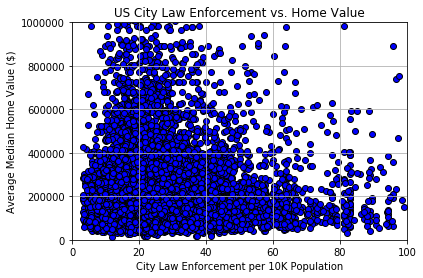

In [14]:
# Create scatter plot of home value against law enforcement

plt.scatter(merged_law_enforcement_homes["Law enforcement per 10K population"], merged_law_enforcement_homes["Average Median Home Value"], marker="o", facecolor="blue", edgecolor="black")
plt.title("US City Law Enforcement vs. Home Value")
plt.ylabel("Average Median Home Value ($)")
plt.xlabel("City Law Enforcement per 10K Population")
plt.xlim(0,100)
plt.ylim(0,1000000)
plt.grid(True)

# Save Figure

plt.savefig("US_City_Law_Enforcement_vs_Home_Value.png", bbox_inches="tight")

In [15]:
# Calculate p-value using pearsonr

(coefficient, p) = pearsonr(merged_law_enforcement_homes["Law enforcement per 10K population"], merged_law_enforcement_homes["Average Median Home Value"])
print("p-value is {}.".format(p))

p-value is 0.36340464404239514.


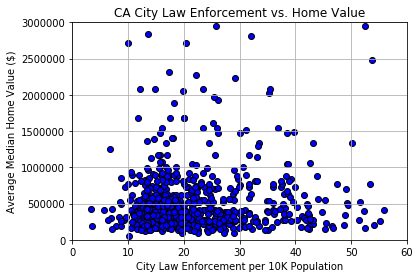

In [16]:
# Create same scatter plot for California cities only

ca_law_enforcement_merged = merged_law_enforcement_homes.loc[merged_law_enforcement_homes["State"] == "CA"]

plt.scatter(ca_law_enforcement_merged["Law enforcement per 10K population"], ca_law_enforcement_merged["Average Median Home Value"], marker="o", facecolor="blue", edgecolor="black")
plt.title("CA City Law Enforcement vs. Home Value")
plt.ylabel("Average Median Home Value ($)")
plt.xlabel("City Law Enforcement per 10K Population")
plt.xlim(0,60)
plt.ylim(0,3000000)
plt.grid(True)

In [18]:
# Calculate p-value using pearsonr

(coefficient, p) = pearsonr(ca_law_enforcement_merged["Law enforcement per 10K population"], ca_law_enforcement_merged["Average Median Home Value"])
print("p-value is {}.".format(p))

p-value is 0.9304844962717338.
